# Homework 14 Group TWO

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

import numpy as np
from matplotlib.colors import ListedColormap
import pysal

### states file

In [2]:
states = gpd.read_file("/Users/catherine/Desktop/lede/14-homework-powerplants/cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [3]:
states.crs

{'init': 'epsg:4269'}

In [4]:
states = states[(states.STUSPS != 'AK') & (states.STUSPS != 'HI') & (states.STUSPS != 'VI') & (states.STUSPS != 'AS') & (states.STUSPS != 'PR') & (states.STUSPS != 'GU') & (states.STUSPS != 'MP')] 

In [5]:
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."


### powerplants.csv

In [6]:
df = pd.read_csv("powerplants.csv")
df.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823


In [7]:
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
geo = gpd.GeoDataFrame(df, geometry=points)
geo.crs = {'init': 'epsg:4269'}
geo.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)


### pm25_annual_fixed.csv

In [8]:
df_pm25 = pd.read_csv("pm25_annual_fixed.csv")
pd.set_option('display.max_columns', 999)
df_pm25.head(1)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18


In [9]:
df_pm25.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Metric Used', 'Method Name', 'Year',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Completeness Indicator', 'Valid Day Count',
       'Required Day Count', 'Exceptional Data Count', 'Null Data Count',
       'Primary Exceedance Count', 'Secondary Exceedance Count',
       'Certification Indicator', 'Num Obs Below MDL', 'Arithmetic Mean',
       'Arithmetic Standard Dev', '1st Max Value', '1st Max DateTime',
       '2nd Max Value', '2nd Max DateTime', '3rd Max Value',
       '3rd Max DateTime', '4th Max Value', '4th Max DateTime',
       '1st Max Non Overlapping Value', '1st NO Max DateTime',
       '2nd Max Non Overlapping Value', '2nd NO Max DateTime',
       '99th Percentile', '98th Percentile', '95th Percentile',
       '90th Percentile', '75th Percentile', '

### Total Carbon Dioxide Emissions-StateRankings.csv

In [10]:
df_co2 = pd.read_csv("Total Carbon Dioxide Emissions-StateRankings.csv")
# Total Carbon Dioxide Emissions, million metric tons
df_co2.head(1)

,Rank,State,"Total Carbon Dioxide Emissions, million metric tons",Note: Rankings are based on the full source data values.
0,1,TX,642.0,NaN


### annual_conc_by_monitor_2017.csv

In [11]:
df_stations = pd.read_csv("annual_conc_by_monitor_2017.csv")
df_stations.head(1)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,Ozone 1-hour Daily 2005,Daily maxima of observed hourly values (betwee...,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,2017,Parts per million,No Events,666,12,N,29,245,0,78,0.0,0.0,Certification not required,0,0.049241,0.008327,0.06,2017-03-19 15:00,0.06,2017-03-31 16:00,0.058,2017-03-20 14:00,0.057,2017-03-04 14:00,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.058,0.056,0.051,0.035,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18


## 1. How many power plants are in each state?


In [12]:
states_pp = gpd.sjoin(geo, states, how='left', op='within')
states_pp.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL


In [13]:
states_pp['NAME'].value_counts()

California              1222
North Carolina           461
Texas                    396
New York                 372
Minnesota                274
Massachusetts            254
Iowa                     222
Michigan                 219
New Jersey               207
Pennsylvania             207
Illinois                 200
Wisconsin                174
Colorado                 153
Ohio                     148
Oregon                   145
Florida                  144
Georgia                  139
Washington               138
Idaho                    136
Indiana                  133
Virginia                 131
Kansas                   129
Missouri                 117
Arizona                  113
Nebraska                  98
Maine                     97
South Carolina            95
Oklahoma                  94
New Mexico                92
Utah                      89
Connecticut               88
Louisiana                 84
Maryland                  76
Vermont                   75
Nevada        

## 2. Which power plants are in New York?

In [14]:
states_pp_ny = states_pp.loc[states_pp['NAME'] == 'New York']
pd.set_option('display.max_rows', 999)
states_pp_ny['Plant_Name']

49                                       Ashokan
363                    Central Hudson High Falls
387                          Upper Mechanicville
469                            Jarvis (Hinckley)
1169               Danskammer Generating Station
1170                                   Dashville
1171                                   Neversink
1172                                 South Cairo
1173                                    Sturgeon
1174                              West Coxsackie
1175              Arthur Kill Generating Station
1176                                  East River
1177             Gowanus Gas Turbines Generating
1178                               Hudson Avenue
1179                              Indian Point 2
1180             Narrows Gas Turbines Generating
1181                                  Ravenswood
1182                                 59th Street
1183                                 74th Street
1184                                 E F Barrett
1185                

## 3. Which state has the most hydroelectric power plants?

In [15]:
states_pp_hydro = states_pp.loc[states_pp['PrimSource'] == 'hydroelectric']
states_pp_hydro.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL


In [16]:
states_pp_hydro.groupby('NAME')['Plant_Code'].count().sort_values(ascending=False).head(1)

NAME
California    245
Name: Plant_Code, dtype: int64

## 4. Which state produces the most energy from coal?

In [17]:
states_pp_coal = states_pp.loc[states_pp['PrimSource'] == 'coal']
states_pp_coal.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.0069,-88.0103,POINT (-88.0103 31.0069),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL


In [18]:
states_pp_coal.groupby('NAME')['Plant_Code'].count().sort_values(ascending=False).head(1)

NAME
Pennsylvania    24
Name: Plant_Code, dtype: int64

## 5. Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.

In [19]:
st= gpd.sjoin(states, geo, how='left', op='intersects')


In [20]:
states.reset_index(inplace=True)

In [21]:
st.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,16,Martin Dam,Alabama Power Co,195,Electric Utility,Dadeville,Elmore,36078,675 Overlook Drive,hydroelectric,186.0,0.0,0.0,0.0,NaN,186.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 186 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.680394,-85.911442
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",4158,55411,Hillabee Energy Center,CER Generation LLC,55987,IPP Non-CHP,Alexander City,Tallapoosa,35010,152 Brick Plant Road,natural gas,721.8,0.0,721.8,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 721.8 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,33.000669,-85.903278
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",17,21,Yates Dam,Alabama Power Co,195,Electric Utility,Tallassee,Elmore,36078,County Road 44,hydroelectric,47.0,0.0,0.0,0.0,NaN,47.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 47 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.574300,-85.890100
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",15,19,Thurlow Dam,Alabama Power Co,195,Electric Utility,Tallassee,Elmore,36078,249 Outer Drive,hydroelectric,78.0,0.0,0.0,0.0,NaN,78.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 78 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.535436,-85.887614
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",1944,6188,Harris Dam,Alabama Power Co,195,Electric Utility,Lineville,Randolph,36266,2671 County Road 100,hydroelectric,132.0,0.0,0.0,0.0,NaN,132.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 132 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.258281,-85.616047


In [22]:
st['Nuclear_MW'].replace(np.nan, 0)

0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0     1757.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
0     3309.4
0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
2        0.0
2        0.0
2        0.0
2        0.0
2        0.0

In [23]:
nuc = st[(st.Nuclear_MW > 0)]

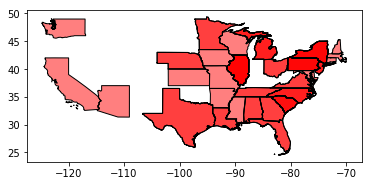

In [24]:
nuc.plot(column='Nuclear_MW', color='red')

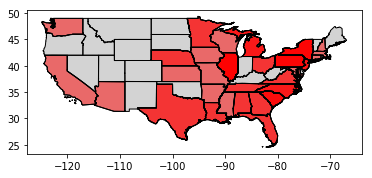

In [25]:
ax = states.plot(color='darkgrey')
nuc.plot(column='Nuclear_MW', color='red', ax=ax)

In [26]:
#no_nuc = st[(st.Nuclear_MW == 0)]

In [27]:
#no_nuc

In [28]:
#no_nuc.plot(column='Nuclear_MW', color='grey')

In [29]:
#states.set_index('NAME', inplace=True)

In [30]:
#states['nuc']= nuc.groupby('NAME')['Nuclear_MW'].sum()

In [31]:
#states['not_nuc']

In [32]:
#states['not_nuc']= no_nuc.groupby('NAME')['Nuclear_MW'].sum()

In [33]:
#states

In [34]:
#states.plot(column='nuc', figsize=(15,15), color='red', linewidth=0.25, edgecolor='white')


In [35]:
#states.plot(column='not_nuc',figsize=(15,15), color='grey', linewidth=0.25, edgecolor='white')

## 6. Make a map of carbon dioxide emissions by state, with low emissions being light orange and high emissions being orange.


In [36]:
co_st = states.merge(df_co2, how='left', left_on='STUSPS', right_on ='State')
co_st.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,Rank,State,"Total Carbon Dioxide Emissions, million metric tons",Note: Rankings are based on the full source data values.
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",15,AL,123.0,NaN
1,2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",23,AZ,93.0,NaN
2,3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",29,AR,69.0,NaN
3,4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",2,CA,358.0,NaN
4,5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",24,CO,92.0,NaN


In [37]:
type(co_st)

geopandas.geodataframe.GeoDataFrame

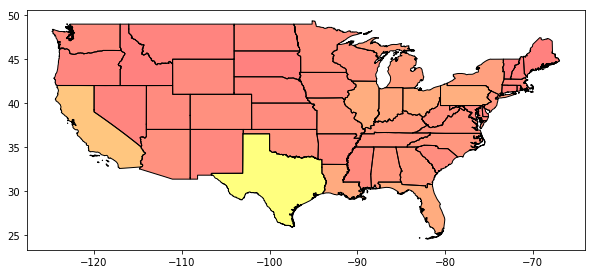

In [38]:
co_st.plot(column= 'Total Carbon Dioxide Emissions, million metric tons', cmap='autumn', figsize=(10,10))

## 7. Make a map of total energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

In [39]:
states_pp

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,130.0,0.0,130.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,1034.0,1034.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
5,9,Copper,El Paso Electric Co,5701,Electric Utility,El Paso,El Paso,79915,651 Hawkins Blvd.,natural gas,62.0,0.0,62.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 62 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,31.756900,-106.375000,POINT (-106.375 31.7569),49,0400000US48,6.766335e+11,1.902599e+10,48,00,Texas,48,01779801,TX
6,10,Greene County,Alabama Power Co,195,Electric Utility,Demopolis,Greene,36732,Highway 43,natural gas,1237.0,497.0,740.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 497 MW, Natural Gas = 740 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,32.601700,-87.781100,POINT (-87.7811 32.6017),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
7,11,H Neely Henry Dam,Alabama Power Co,195,Electric Utility,Ohatchee,Calhoun,36271,1021 Ala Highway 144,hydroelectric,70.0,0.0,0.0,0.0,NaN,70.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 70 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.784500,-86.052400,POINT (-86.05240000000001 33.7845),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
8,12,Holt Dam,Alabama Power Co,195,Electric Utility,Tuscaloosa,Tuscaloosa,35476,12117 Power Plant Road,hydroelectric,45.0,0.0,0.0,0.0,NaN,45.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 45 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.255300,-87.449500,POINT (-87.4495 33.2553),0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
9,13,Jordan Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,6150Jordan Dam Lane,hydroelectric,100.0,0.0,0.0,0.0,NaN,100.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 100 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.618900,-86.254800,POINT (-86.2548 32.61

In [40]:
states_pp.groupby('NAME')['Total_MW'].sum().head()

NAME
Alabama       29654.0
Arizona       27083.4
Arkansas      14706.7
California    76586.9
Colorado      15807.9
Name: Total_MW, dtype: float64

In [41]:
states.set_index('NAME', inplace=True)

In [42]:
states['sum']= states_pp.groupby('NAME')['Total_MW'].sum()

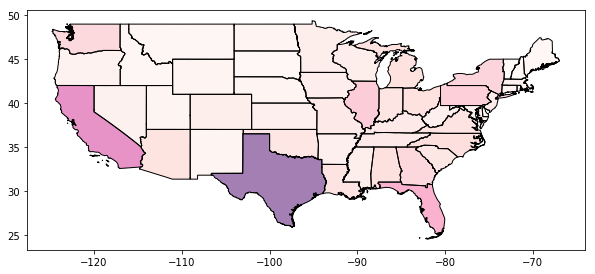

In [43]:
states.plot(column='sum', cmap='RdPu', figsize=(10,10))

## 8. Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

In [44]:
states['wind_sum']= states_pp.groupby('NAME')['Wind_MW'].sum()

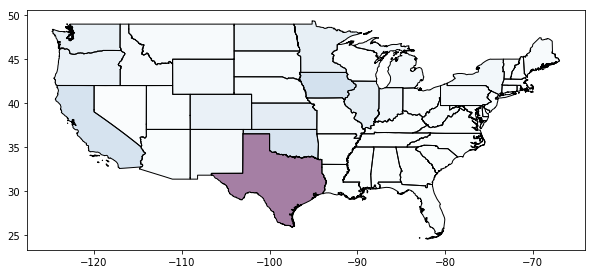

In [45]:
states.plot(column='wind_sum', cmap='BuPu', figsize=(10,10))

## 9. Make a map of average air quality of each states, with high quality being light red and low quality being dark red


In [46]:
df_pm25.head(1)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18


In [48]:
states.reset_index(inplace=True)

In [49]:
pm_st = states.merge(df_pm25, how='left', left_on='NAME', right_on ='State Name')
pm_st.head()

,NAME,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,sum,wind_sum,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,Alabama,0,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",29654.0,0.0,1.0,3.0,10.0,88101.0,1.0,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,28.0,23.0,N,28.0,122.0,0.0,2.0,0.0,0.0,Certification not required,0.0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18
1,Alabama,0,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",29654.0,0.0,1.0,27.0,1.0,88101.0,1.0,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,27.0,22.0,N,27.0,122.0,0.0,5.0,0.0,0.0,Certification not required,0.0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18
2,Alabama,0,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",29654.0,0.0,1.0,33.0,1002.0,88101.0,1.0,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,30.0,25.0,N,30.0,122.0,0.0,0.0,0.0,0.0,Certification not required,0.0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18
3,Alabama,0,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",29654.0,0.0,1.0,49.0,1003.0,88101.0,1.0,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,30.0,25.0,N,30.0,122.0,0.0,0.0,0.0,0.0,Certification not required,0.0,8.083333,3.146436,14.8,2017-03-05 00:00,14.6,2017-02-18 00:00,13.1,2017-02-21 00:00,12.3,2017-01-16 00:00,NaN,NaN,NaN,NaN,14.8,14.8,14.6,13.1,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19
4,Alabama,0,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",29654.0,0.0,1.0,55.0,10.0,88101.0,1.0,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,30.0,25.0,N,

In [50]:
pm_st.groupby('NAME')['Arithmetic Mean'].mean().head()

NAME
Alabama       8.600705
Arizona       7.126441
Arkansas      7.344940
California    9.353585
Colorado      5.868046
Name: Arithmetic Mean, dtype: float64

In [51]:
states.set_index('NAME', inplace=True)

In [52]:
states['aver_air_quality'] = pm_st.groupby('NAME')['Arithmetic Mean'].mean()
states.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,sum,wind_sum,aver_air_quality
NAME,,,,,,,,,,,,,
Alabama,0,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",29654.0,0.0,8.600705
Arizona,2,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",27083.4,267.3,7.126441
Arkansas,3,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",14706.7,0.0,7.344940
California,4,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",76586.9,5720.9,9.353585
Colorado,5,0400000US08,268429343790,1175112870,08,00,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",15807.9,2961.8,5.868046


(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

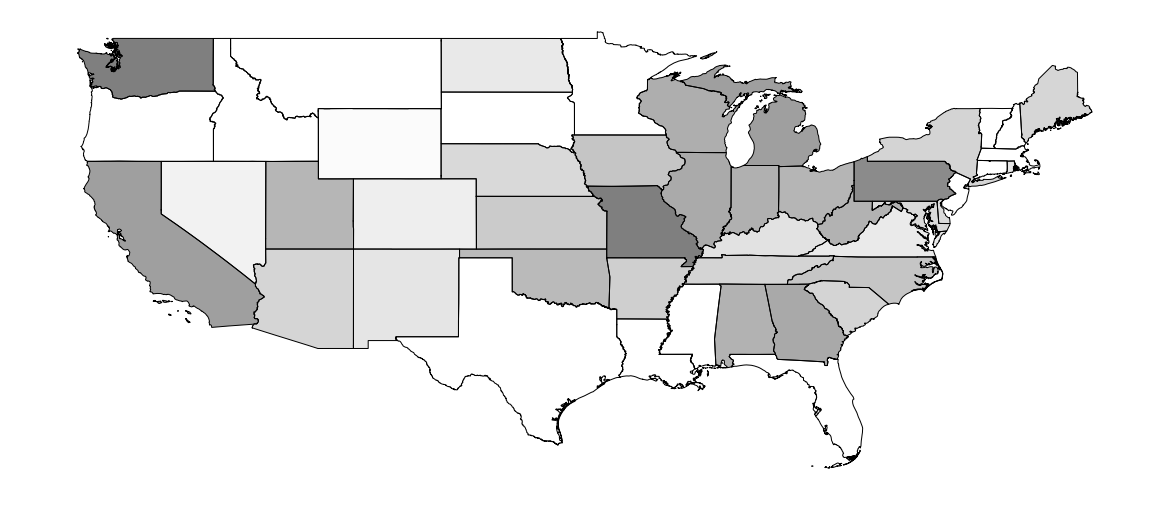

In [53]:
ax = states.plot(column='aver_air_quality', cmap='Greys', figsize=(20,20))
ax.axis('off')

## 10. Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red

In [54]:
pm_st.groupby('NAME')['1st Max Value'].max().head()

NAME
Alabama       47.7
Arizona       21.5
Arkansas      16.6
California    46.4
Colorado      26.2
Name: 1st Max Value, dtype: float64

In [55]:
states.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,sum,wind_sum,aver_air_quality
NAME,,,,,,,,,,,,,
Alabama,0,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",29654.0,0.0,8.600705
Arizona,2,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",27083.4,267.3,7.126441
Arkansas,3,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",14706.7,0.0,7.344940
California,4,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",76586.9,5720.9,9.353585
Colorado,5,0400000US08,268429343790,1175112870,08,00,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",15807.9,2961.8,5.868046


In [56]:
states.reset_index(inplace=True)

In [57]:
states.set_index('NAME', inplace=True)

In [59]:
states['worst_air_quality'] = pm_st.groupby('NAME')['1st Max Value'].max()

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

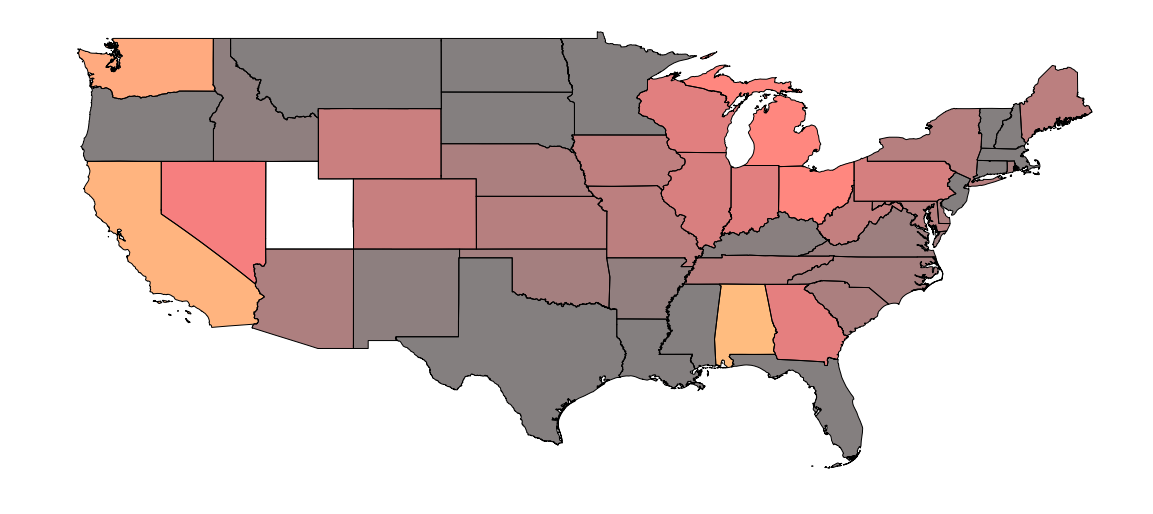

In [60]:
ax = states.plot(column='worst_air_quality', cmap='hot', figsize=(20,20))
ax.axis('off')